In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv("data/IMDB.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:

def clean_text(text):
    text = re.sub('<br />', ' ', text)  
    text = re.sub('[^a-zA-Z]', ' ', text)  
    return text.lower()

# Apply the cleaning function to the review column
df['cleaned_reviews'] = df['review'].apply(clean_text)

# Drop the original review column
df = df.drop('review', axis=1)

# Export the DataFrame to a CSV file
df.to_csv('data/clean_IMDB.csv', index=False) 

In [4]:
df.head()

,sentiment,cleaned_reviews
0,positive,one of the other reviewers has mentioned that ...
1,positive,a wonderful little production the filming t...
2,positive,i thought this was a wonderful way to spend ti...
3,negative,basically there s a family where a little boy ...
4,positive,petter mattei s love in the time of money is...


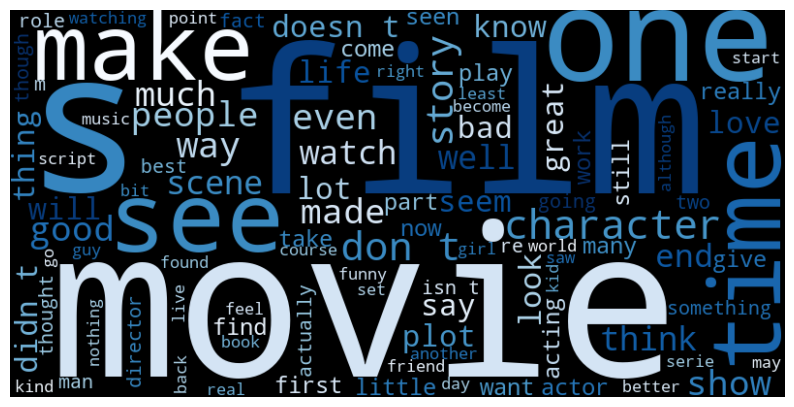

In [5]:
from wordcloud import WordCloud

# Join all reviews into a single string
all_text = ' '.join(df['cleaned_reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues', max_words=100).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("results/MovieWordCloud.png")
plt.show()
